In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from datetime import datetime
import json 
from pandas.io.json import json_normalize
from scipy import stats
import statsmodels.api as sm  ## OLS
import os

In [2]:
os.getcwd()

'C:\\Users\\jdsip\\OneDrive\\Desktop\\anacondadownload\\Untitled Folder'

In [3]:
batting = pd.read_csv('batting.csv')

In [4]:
batting.head()

,playerid,Name,Team,MarApr_PA,MarApr_AB,MarApr_H,MarApr_HR,MarApr_R,MarApr_RBI,MarApr_SB,...,MarApr_FB%,MarApr_IFFB%,MarApr_HR/FB,MarApr_O-Swing%,MarApr_Z-Swing%,MarApr_Swing%,MarApr_O-Contact%,MarApr_Z-Contact%,MarApr_Contact%,FullSeason_OBP
0,15998,Cody Bellinger,LAD,132,109,47,14,32,37,5,...,36.1%,5.7%,40.0%,22.6%,66.0%,40.7%,81.1%,88.4%,86.0%,0.406
1,11477,Christian Yelich,MIL,124,102,36,14,26,34,6,...,41.0%,11.8%,41.2%,27.9%,72.4%,44.8%,56.6%,87.8%,75.7%,0.429
2,17975,Scott Kingery,PHI,35,32,13,2,5,6,1,...,33.3%,0.0%,22.2%,40.2%,74.5%,53.5%,54.3%,85.4%,71.1%,0.315
3,7927,Eric Sogard,TOR,49,43,17,3,8,9,2,...,40.5%,0.0%,20.0%,27.3%,50.5%,37.3%,93.9%,97.8%,96.2%,0.353
4,14130,Daniel Vogelbach,SEA,92,71,22,8,15,16,0,...,51.9%,7.4%,29.6%,23.7%,48.8%,33.7%,66.1%,82.7%,75.7%,0.341


In [5]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [6]:
train_set, test_set = split_train_test(batting,0.2)

In [7]:
len(train_set)

256

In [8]:
len(test_set)

64

In [9]:
corr_matrix = batting.corr()

In [10]:
corr_matrix

,playerid,MarApr_PA,MarApr_AB,MarApr_H,MarApr_HR,MarApr_R,MarApr_RBI,MarApr_SB,MarApr_ISO,MarApr_BABIP,MarApr_AVG,MarApr_OBP,MarApr_SLG,FullSeason_OBP
playerid,1.000000,-0.032603,-0.026978,-0.022283,0.057198,0.025091,0.021103,0.104193,0.099439,0.069763,-0.006427,-0.025920,0.069161,-0.018071
MarApr_PA,-0.032603,1.000000,0.987429,0.870323,0.533985,0.787763,0.665858,0.306125,0.158610,0.039019,0.208340,0.218682,0.208542,0.333457
MarApr_AB,-0.026978,0.987429,1.000000,0.875959,0.501740,0.757282,0.644082,0.316304,0.125104,0.042137,0.202434,0.133303,0.181720,0.262221
MarApr_H,-0.022283,0.870323,0.875959,1.000000,0.539303,0.820362,0.703209,0.323247,0.286578,0.396218,0.619313,0.488440,0.486351,0.434936
MarApr_HR,0.057198,0.533985,0.501740,0.539303,1.000000,0.681117,0.817412,0.063386,0.806343,-0.029405,0.299848,0.346441,0.717138,0.349902
MarApr_R,0.025091,0.787763,0.757282,0.820362,0.681117,1.000000,0.724608,0.310443,0.453260,0.203886,0.442119,0.467841,0.526650,0.462198
MarApr_RBI,0.021103,0.665858,0.644082,0.703209,0.817412,0.724608,1.000000,0.166726,0.611487,0.068687,0.389536,0.359117,0.617139,0.396761
MarApr_SB,0.104193,0.306125,0.316304,0.323247,0.063386,0.310443,0.166726,1.000000,-0.047288,0.119390,0.131105,0.063530,0.025104,0.097289
MarApr_ISO,0.099439,0.158610,0.125104,0.286578,0.806343,0.453260,0.611487,-0.047288,1.000000,0.105129,0.423157,0.440141,0.912585,0.323044
MarApr_BABIP,0.069763,0.039019,0.042137,0.396218,-0.029405,0.203886,0.068687,0.119390,0.105129,1.000000,0.799158,0.651858,0.436341,0.250440


In [11]:
from sklearn.feature_selection import VarianceThreshold

In [12]:
objlist = list(batting.select_dtypes(['object']).columns)

In [13]:
objlist

['Name',
 'Team',
 'MarApr_BB%',
 'MarApr_K%',
 'MarApr_LD%',
 'MarApr_GB%',
 'MarApr_FB%',
 'MarApr_IFFB%',
 'MarApr_HR/FB',
 'MarApr_O-Swing%',
 'MarApr_Z-Swing%',
 'MarApr_Swing%',
 'MarApr_O-Contact%',
 'MarApr_Z-Contact%',
 'MarApr_Contact%']

In [14]:
objlist2 = objlist[2:]

In [15]:
objlist2

['MarApr_BB%',
 'MarApr_K%',
 'MarApr_LD%',
 'MarApr_GB%',
 'MarApr_FB%',
 'MarApr_IFFB%',
 'MarApr_HR/FB',
 'MarApr_O-Swing%',
 'MarApr_Z-Swing%',
 'MarApr_Swing%',
 'MarApr_O-Contact%',
 'MarApr_Z-Contact%',
 'MarApr_Contact%']

In [16]:
for i in objlist2:
    batting[i] = list(map(lambda x: x[:-1],batting[i].values))

In [17]:
batting.head()

,playerid,Name,Team,MarApr_PA,MarApr_AB,MarApr_H,MarApr_HR,MarApr_R,MarApr_RBI,MarApr_SB,...,MarApr_FB%,MarApr_IFFB%,MarApr_HR/FB,MarApr_O-Swing%,MarApr_Z-Swing%,MarApr_Swing%,MarApr_O-Contact%,MarApr_Z-Contact%,MarApr_Contact%,FullSeason_OBP
0,15998,Cody Bellinger,LAD,132,109,47,14,32,37,5,...,36.1,5.7,40.0,22.6,66.0,40.7,81.1,88.4,86.0,0.406
1,11477,Christian Yelich,MIL,124,102,36,14,26,34,6,...,41.0,11.8,41.2,27.9,72.4,44.8,56.6,87.8,75.7,0.429
2,17975,Scott Kingery,PHI,35,32,13,2,5,6,1,...,33.3,0.0,22.2,40.2,74.5,53.5,54.3,85.4,71.1,0.315
3,7927,Eric Sogard,TOR,49,43,17,3,8,9,2,...,40.5,0.0,20.0,27.3,50.5,37.3,93.9,97.8,96.2,0.353
4,14130,Daniel Vogelbach,SEA,92,71,22,8,15,16,0,...,51.9,7.4,29.6,23.7,48.8,33.7,66.1,82.7,75.7,0.341


In [18]:
for i in objlist2:
    batting[i] = batting[i].apply(pd.to_numeric)

In [19]:
batting.dtypes

playerid               int64
Name                  object
Team                  object
MarApr_PA              int64
MarApr_AB              int64
MarApr_H               int64
MarApr_HR              int64
MarApr_R               int64
MarApr_RBI             int64
MarApr_SB              int64
MarApr_BB%           float64
MarApr_K%            float64
MarApr_ISO           float64
MarApr_BABIP         float64
MarApr_AVG           float64
MarApr_OBP           float64
MarApr_SLG           float64
MarApr_LD%           float64
MarApr_GB%           float64
MarApr_FB%           float64
MarApr_IFFB%         float64
MarApr_HR/FB         float64
MarApr_O-Swing%      float64
MarApr_Z-Swing%      float64
MarApr_Swing%        float64
MarApr_O-Contact%    float64
MarApr_Z-Contact%    float64
MarApr_Contact%      float64
FullSeason_OBP       float64
dtype: object

In [20]:
batting2 = batting.drop(['playerid','Name','Team'],axis =1)

In [21]:
battingextras = batting[['playerid','Name','Team']]

In [22]:
batting2.shape

(320, 26)

In [23]:
def variance_threshold_selector(data, threshold=0.16):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return batting2[data.columns[selector.get_support(indices=True)]]

In [24]:
batting3 = variance_threshold_selector(batting2, .5)

In [25]:
batting3

,MarApr_PA,MarApr_AB,MarApr_H,MarApr_HR,MarApr_R,MarApr_RBI,MarApr_SB,MarApr_BB%,MarApr_K%,MarApr_LD%,MarApr_GB%,MarApr_FB%,MarApr_IFFB%,MarApr_HR/FB,MarApr_O-Swing%,MarApr_Z-Swing%,MarApr_Swing%,MarApr_O-Contact%,MarApr_Z-Contact%,MarApr_Contact%
0,132,109,47,14,32,37,5,14.4,11.4,34.0,29.9,36.1,5.7,40.0,22.6,66.0,40.7,81.1,88.4,86.0
1,124,102,36,14,26,34,6,16.1,16.1,15.7,43.4,41.0,11.8,41.2,27.9,72.4,44.8,56.6,87.8,75.7
2,35,32,13,2,5,6,1,2.9,14.3,14.8,51.9,33.3,0.0,22.2,40.2,74.5,53.5,54.3,85.4,71.1
3,49,43,17,3,8,9,2,10.2,10.2,29.7,29.7,40.5,0.0,20.0,27.3,50.5,37.3,93.9,97.8,96.2
4,92,71,22,8,15,16,0,21.7,21.7,21.2,26.9,51.9,7.4,29.6,23.7,48.8,33.7,66.1,82.7,75.7
5,86,73,26,6,21,18,0,10.5,17.4,20.3,30.5,49.2,10.3,20.7,22.9,64.6,40.3,71.7,93.5,86.3
6,50,46,16,5,11,10,0,8.0,26.0,18.2,42.4,39.4,0.0,38.5,20.9,51.1,32.9,57.1,91.1,78.1
7,30,27,10,2,3,4,0,10.0,36.7,37.5,12.5,50.0,0.0,25.0,29.5,64.5,45.0,39.1,82.5,66.7
8,103,86,30,7,14,17,0,14.6,17.5,18.8,31.9,49.3,0.0,20.6,22.4,55.3,37.0,51.1,94.4,79.9
9,83,74,26,6,11,19,3,9.6,21.7,23.2,33.9,42.9,12.5,25.0,26.9,56.7,38.5,58.3,83.8,72.9


In [26]:
batting4 = pd.DataFrame(data=batting3)

In [27]:
batting5 = batting4.join(battingextras)

In [28]:
batting5.columns

Index(['MarApr_PA', 'MarApr_AB', 'MarApr_H', 'MarApr_HR', 'MarApr_R',
       'MarApr_RBI', 'MarApr_SB', 'MarApr_BB%', 'MarApr_K%', 'MarApr_LD%',
       'MarApr_GB%', 'MarApr_FB%', 'MarApr_IFFB%', 'MarApr_HR/FB',
       'MarApr_O-Swing%', 'MarApr_Z-Swing%', 'MarApr_Swing%',
       'MarApr_O-Contact%', 'MarApr_Z-Contact%', 'MarApr_Contact%', 'playerid',
       'Name', 'Team'],
      dtype='object')

In [29]:
y = batting['FullSeason_OBP']

In [30]:
X = batting4

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

In [34]:
conda install -c conda-forge xgboost=0.6a2

Solving environment: ...working... failed with current_repodata.json, will retry with next repodata source.
Solving environment: ...working... failed

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - xgboost=0.6a2

Current channels:

  - https://conda.anaconda.org/conda-forge/win-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [35]:
model = XGBClassifier()

In [36]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

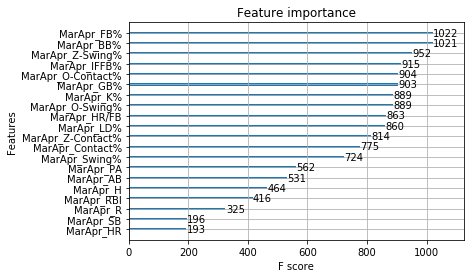

In [37]:
plot_importance(model)
pyplot.show()

In [38]:
from numpy import sort
from numpy import loadtxt

In [39]:
thresholds = sort(model.feature_importances_)

In [40]:
thresholds

array([0.04320304, 0.04538826, 0.04648925, 0.04688256, 0.04721319,
       0.04739544, 0.04744267, 0.0475141 , 0.04876852, 0.04909698,
       0.04946375, 0.04983687, 0.05022607, 0.05045249, 0.05261981,
       0.05263972, 0.05280296, 0.05363943, 0.05890024, 0.06002465],
      dtype=float32)

In [41]:
xgselection = SelectFromModel(model,threshold = .045, prefit=True)

In [42]:
select_X_train = xgselection.transform(X_train)
select_X_test = xgselection.transform(X_test)

In [43]:
select_X_train.shape

(214, 19)

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
regr = RandomForestRegressor()

In [46]:
regr.fit(select_X_train,y_train)

C:\Users\jdsip\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [47]:
y_pred = regr.predict(select_X_test)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
y_pred.dtype

dtype('float64')

In [50]:
y_test.dtype

dtype('float64')

In [51]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [52]:
rms = sqrt(mean_squared_error(y_test, y_pred))

In [53]:
rms

0.03251128831536099